In [98]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight') #图片 尺寸
%matplotlib inline
# 中文
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False


In [99]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [100]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [101]:
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [102]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-15-2020.csv')

In [103]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-16 04:24:01,33.93911,67.709953,40026,1481,33447,5098.0,Afghanistan,102.819691,3.700095
1,NaN,NaN,NaN,Albania,2020-10-16 04:24:01,41.15330,20.168300,16212,439,9864,5909.0,Albania,563.347001,2.707871
2,NaN,NaN,NaN,Algeria,2020-10-16 04:24:01,28.03390,1.659600,53777,1827,37603,14347.0,Algeria,122.635624,3.397363
3,NaN,NaN,NaN,Andorra,2020-10-16 04:24:01,42.50630,1.521800,3190,59,2011,1120.0,Andorra,4128.648159,1.849530
4,NaN,NaN,NaN,Angola,2020-10-16 04:24:01,-11.20270,17.873900,7096,228,2928,3940.0,Angola,21.590526,3.213078


In [157]:
confirmed_df['7/26/20'].sum()

16255260

In [104]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096


In [105]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 272 entries, Province/State to 10/15/20
dtypes: float64(2), int64(268), object(2)
memory usage: 567.5+ KB


In [106]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/6/20', '10/7/20', '10/8/20', '10/9/20', '10/10/20', '10/11/20',
       '10/12/20', '10/13/20', '10/14/20', '10/15/20'],
      dtype='object', length=272)

In [107]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
confirmed #确诊人数

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20
0,0,0,0,0,0,0,0,0,0,0,...,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026
1,0,0,0,0,0,0,0,0,0,0,...,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212
2,0,0,0,0,0,0,0,0,0,0,...,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777
3,0,0,0,0,0,0,0,0,0,0,...,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190
4,0,0,0,0,0,0,0,0,0,0,...,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0,0,0,0,0,0,0,0,0,0,...,42432,42840,43256,43664,43945,44299,44684,45200,45658,46100
263,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
264,0,0,0,0,0,0,0,0,0,0,...,2047,2049,2050,2051,2051,2052,2052,2053,2053,2053
265,0,0,0,0,0,0,0,0,0,0,...,15170,15224,15301,15339,15415,15458,15549,15587,15616,15659


In [153]:
confirmed['7/26/20'].sum()

16255260

In [108]:
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
deaths #死亡人数

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1467,1469,1470,1472,1473,1477,1479,1480,1481,1481
1,0,0,0,0,0,0,0,0,0,0,...,403,407,411,413,416,420,424,429,434,439
2,0,0,0,0,0,0,0,0,0,0,...,1768,1771,1783,1789,1795,1801,1809,1818,1827,1827
3,0,0,0,0,0,0,0,0,0,0,...,53,53,54,55,55,55,57,57,59,59
4,0,0,0,0,0,0,0,0,0,0,...,211,211,208,212,218,218,219,222,227,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0,0,0,0,0,0,0,0,0,0,...,349,355,359,367,378,381,387,391,393,401
263,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
264,0,0,0,0,0,0,0,0,0,0,...,593,593,593,593,595,595,596,596,596,596
265,0,0,0,0,0,0,0,0,0,0,...,335,335,335,336,337,337,345,345,345,346


In [109]:
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
recoveries #康复人数

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20
0,0,0,0,0,0,0,0,0,0,0,...,32977,33045,33058,33058,33064,33114,33118,33308,33354,33447
1,0,0,0,0,0,0,0,0,0,0,...,8965,9115,9215,9304,9406,9500,9585,9675,9762,9864
2,0,0,0,0,0,0,0,0,0,0,...,36763,36857,36958,37067,37170,37170,37382,37492,37603,37603
3,0,0,0,0,0,0,0,0,0,0,...,1615,1715,1715,1814,1814,1814,1928,1928,2011,2011
4,0,0,0,0,0,0,0,0,0,0,...,2598,2598,2635,2685,2716,2743,2744,2761,2801,2928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,35599,35953,36584,36922,37240,37942,38228,38841,39304,39585
250,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
251,0,0,0,0,0,0,0,0,0,0,...,1327,1328,1329,1329,1329,1329,1329,1329,1329,1329
252,0,0,0,0,0,0,0,0,0,0,...,14313,14342,14365,14439,14541,14599,14682,14783,14850,14899


In [110]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/6/20', '10/7/20', '10/8/20', '10/9/20', '10/10/20', '10/11/20',
       '10/12/20', '10/13/20', '10/14/20', '10/15/20'],
      dtype='object', length=268)

In [111]:
#全球
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
#各国的案例 中国、意大利、美国、西班牙、法国、德国、英国
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
#各国的死亡人数 中国、意大利、美国、西班牙、法国、德国、英国
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
#各国的康复人数 中国、意大利、美国、西班牙、法国、德国、英国
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 

In [112]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # 确认、死亡、康复和活动
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # 比例
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
        # 案例研究
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())

In [113]:
#定一个函数，求每天增加的人数，确诊、死亡、痊愈
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [114]:
#确诊
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
#死亡
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
#康复
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)

In [115]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# 绘制确诊病例、活动性病例、死亡、康复、死亡率和康复率的图表

In [116]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

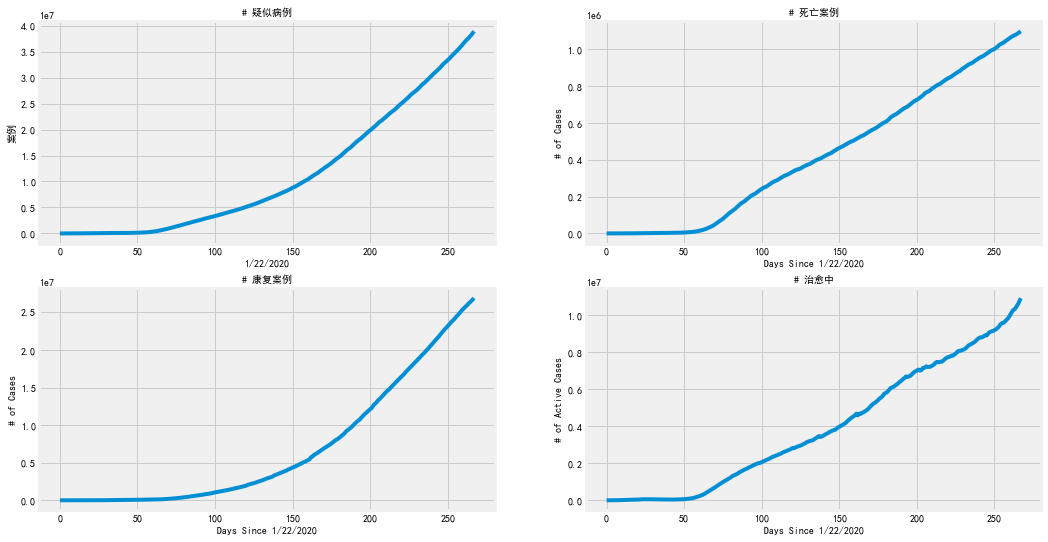

In [119]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.subplot(221)
plt.plot(adjusted_dates, world_cases)
plt.title('# 疑似病例', size=10)
plt.xlabel('1/22/2020', size=10)
plt.ylabel('案例', size=10)
plt.xticks(size=10)
plt.yticks(size=10)


plt.subplot(222)
plt.plot(adjusted_dates, total_deaths)
plt.title('# 死亡案例', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)

plt.subplot(223)
plt.plot(adjusted_dates, total_recovered)
plt.title('# 康复案例', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)

plt.subplot(224)
plt.plot(adjusted_dates, total_active)
plt.title('# 治愈中', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Active Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [120]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} 确认病例'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} 确诊病例'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} 死亡病例'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} 康复病例'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

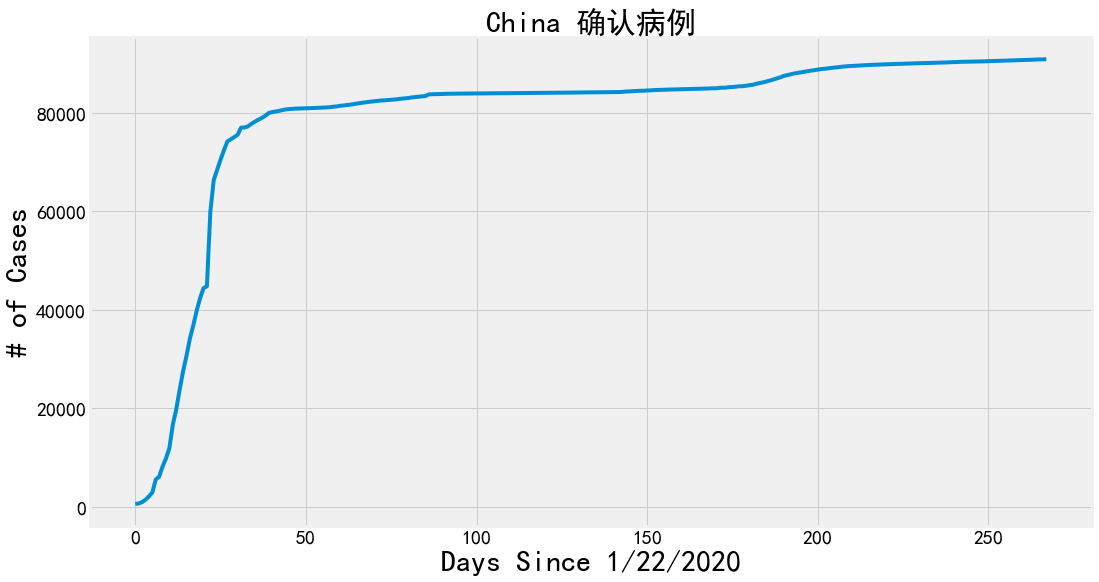

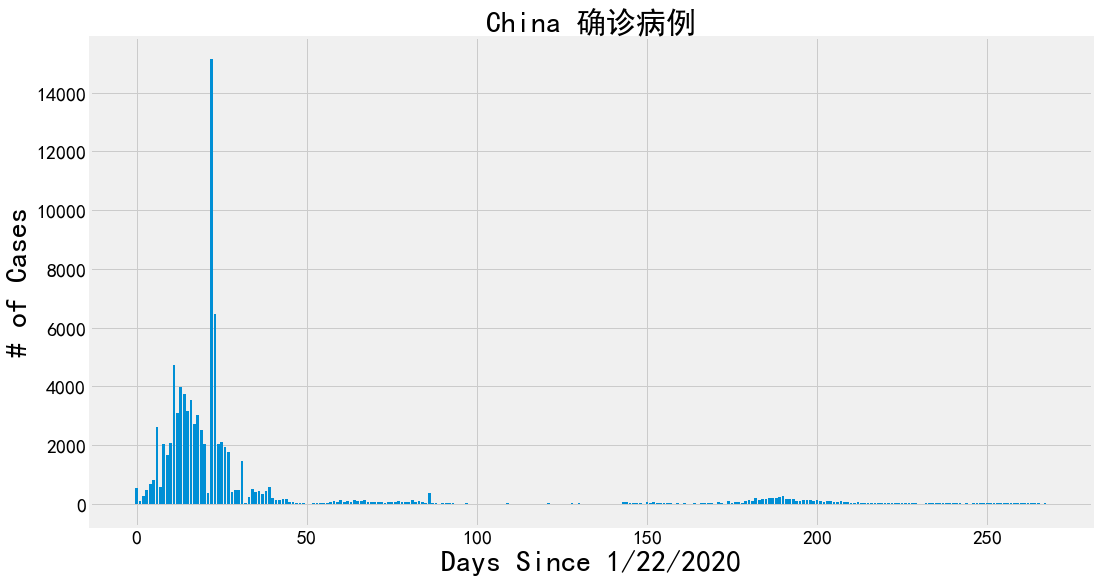

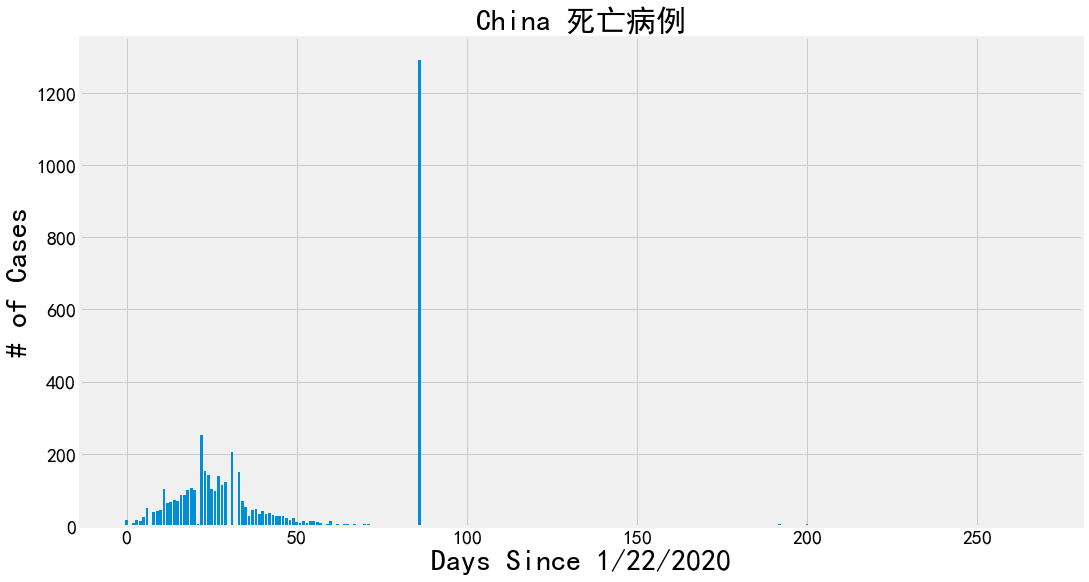

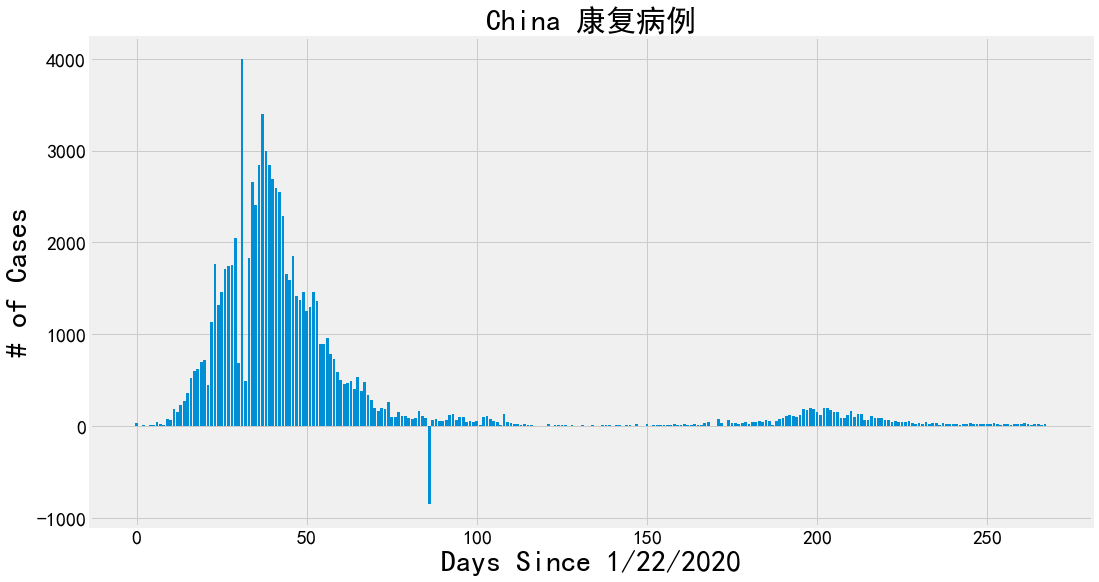

In [121]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

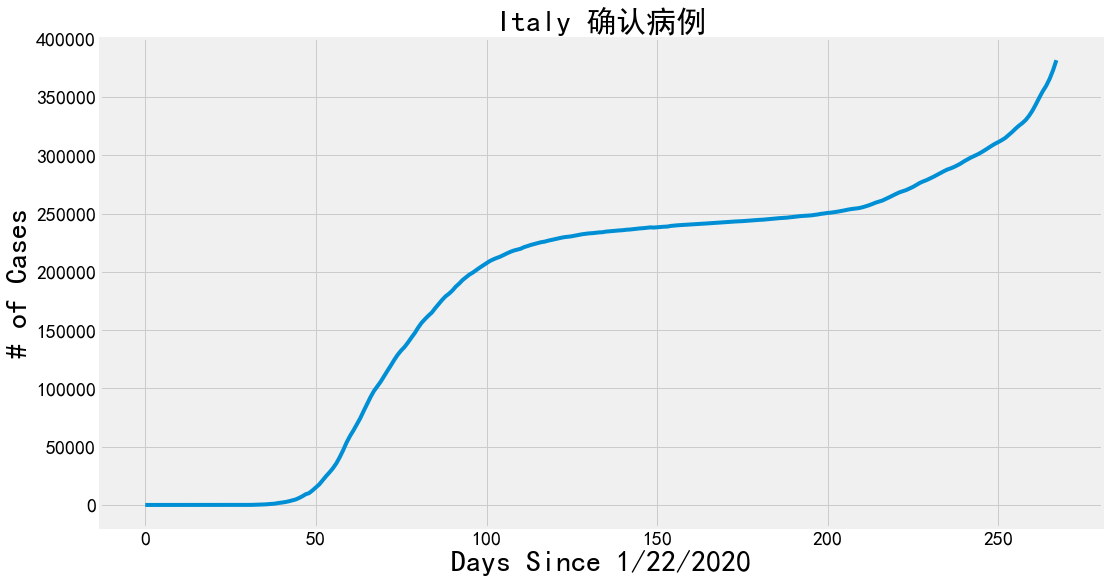

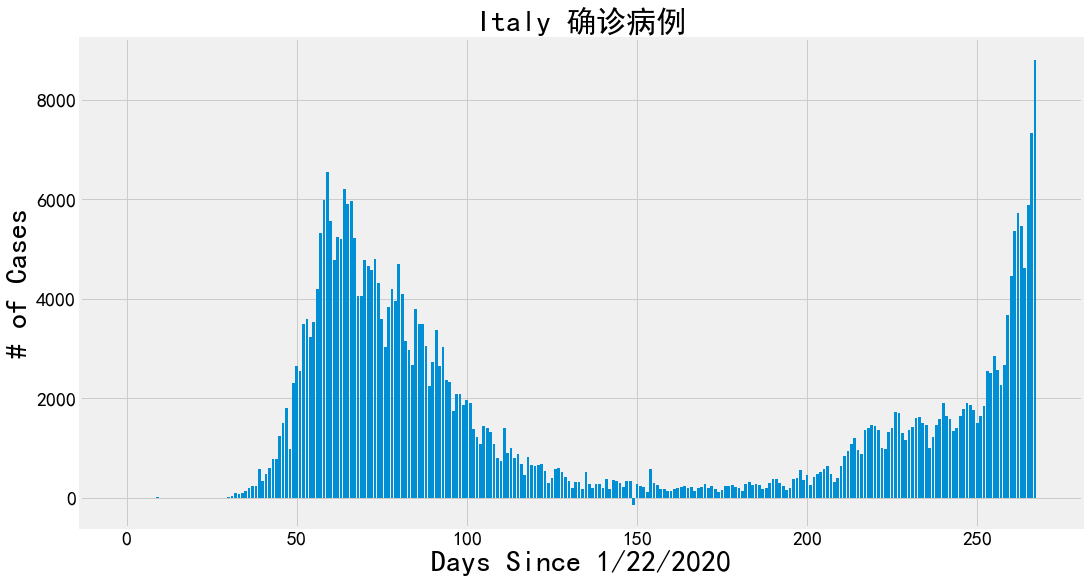

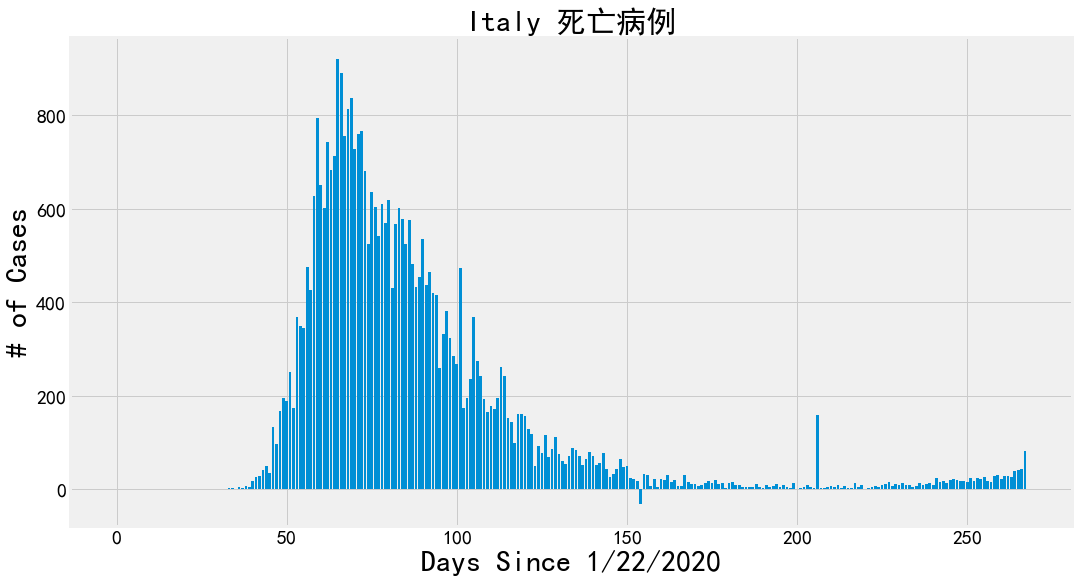

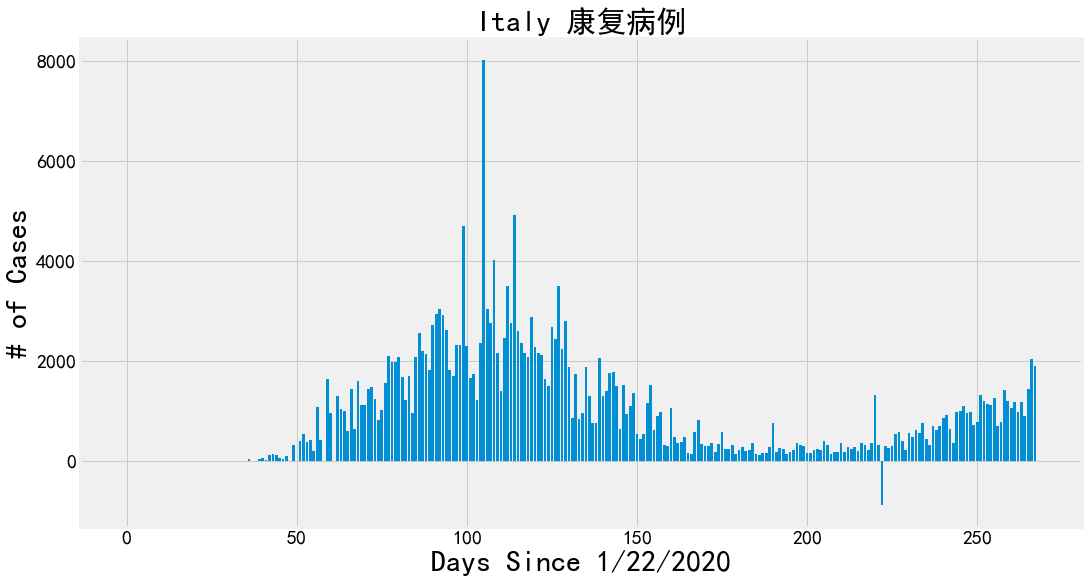

In [122]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

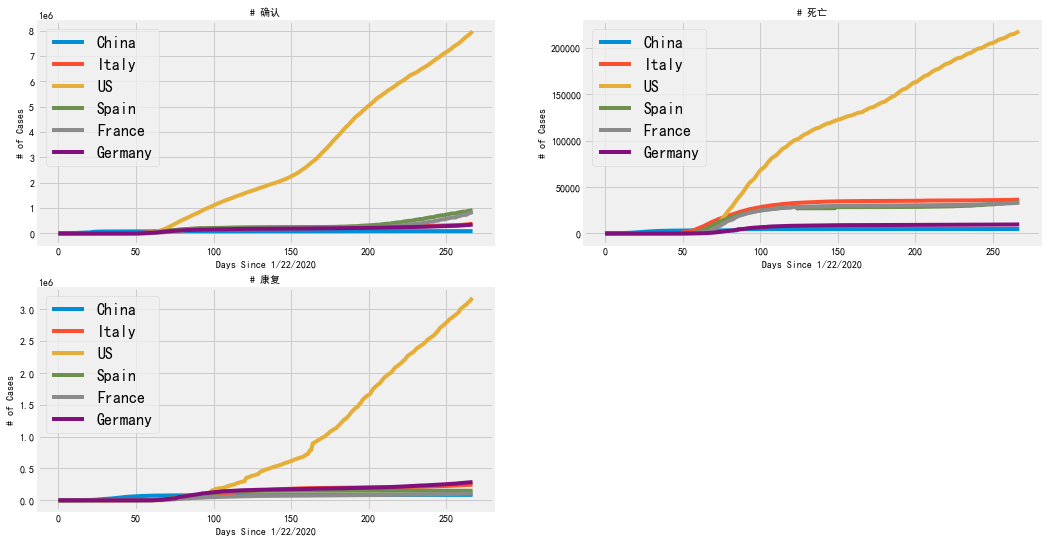

In [123]:
plt.figure(figsize=(16, 9))
plt.subplot(221)
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)

plt.title('# 确认', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Cases', size=10)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 16})
plt.xticks(size=10)
plt.yticks(size=10)



plt.subplot(222)
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)

plt.title('# 死亡', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Cases', size=10)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 16})
plt.xticks(size=10)
plt.yticks(size=10)

plt.subplot(223)
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.title('# 康复', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Cases', size=10)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size':16})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [124]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.07, shuffle=False) 

In [125]:
# 将整数转换为日期时间以获得更好的可视化效果
start = '4/18/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))



In [126]:
# svm_search.best_params_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 10522915.051636556
MSE: 114724720886553.5


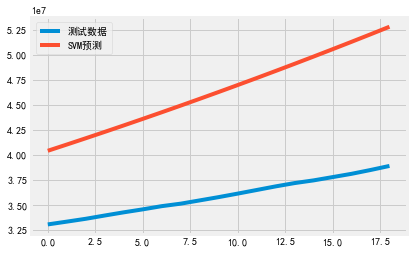

In [127]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['测试数据', 'SVM预测'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))


In [128]:
# 将数据转换为多项式回归
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)


In [129]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 1085669.466312265
MSE: 1225246339853.6045


In [130]:
print(linear_model.coef_)

[[ 2.46626028e+05 -2.35782679e+04  4.36482814e+02  7.99193609e-01]]


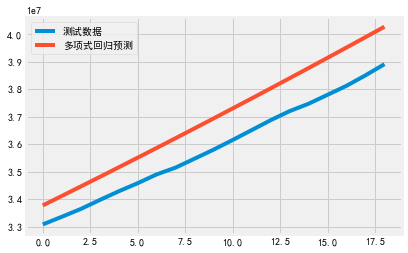

In [131]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['测试数据', '多项式回归预测'])

In [132]:
# 贝叶斯岭多项式回归
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.1s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [133]:
bayesian_search.best_params_

{'tol': 1e-05,
 'normalize': False,
 'lambda_2': 1e-05,
 'lambda_1': 0.001,
 'alpha_2': 1e-07,
 'alpha_1': 1e-07}

In [134]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))


MAE: 492993.4142128229
MSE: 245878091064.11606


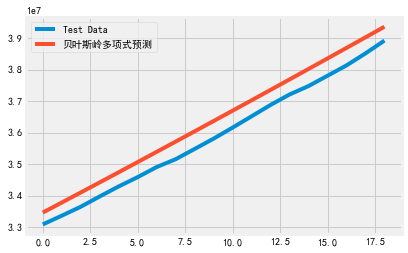

In [135]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', '贝叶斯岭多项式预测'])

In [136]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# 病例的增加', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# 案例', size=30)
    plt.legend(['确诊案例', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

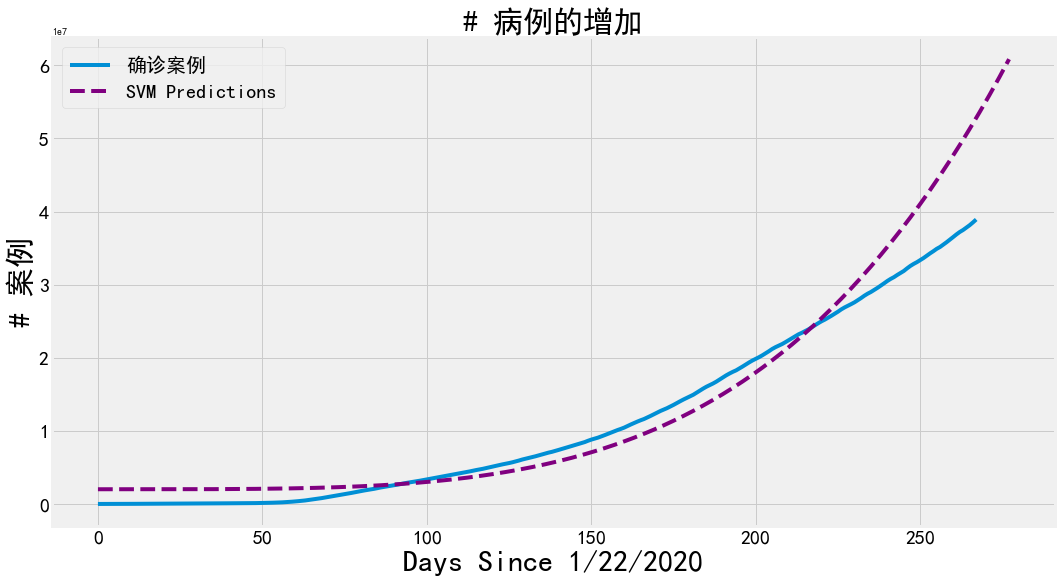

In [137]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')


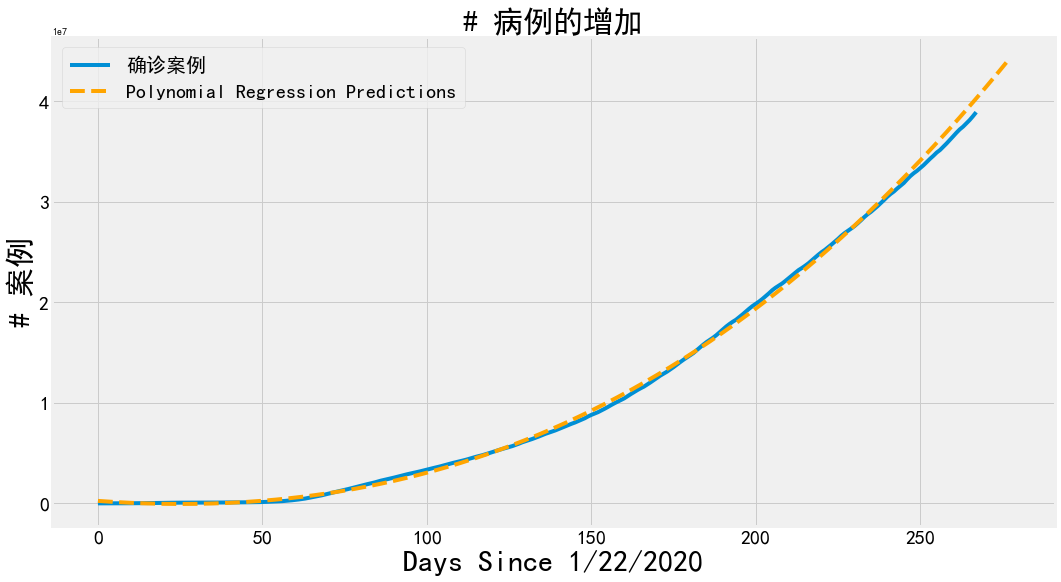

In [138]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')


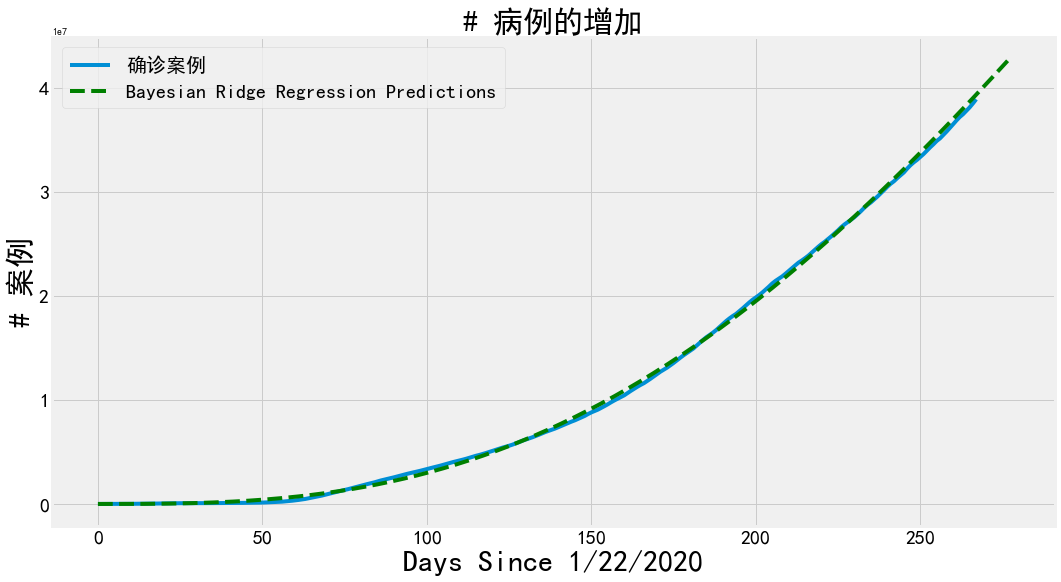

In [139]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')


In [140]:
# 使用svm未来预测
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM 预计全球确诊病例数': np.round(svm_pred[-10:])})
svm_df


,Date,SVM 预计全球确诊病例数
0,01/11/2021,53566161.0
1,01/12/2021,54339942.0
2,01/13/2021,55122402.0
3,01/14/2021,55913603.0
4,01/15/2021,56713612.0
5,01/16/2021,57522494.0
6,01/17/2021,58340313.0
7,01/18/2021,59167136.0
8,01/19/2021,60003028.0
9,01/20/2021,60848055.0


In [141]:
# 使用多项式回归未来预测
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial 预计全球确诊病例数': np.round(linear_pred[-10:])})
svm_df

,Date,Polynomial 预计全球确诊病例数
0,01/11/2021,40661135.0
1,01/12/2021,41044796.0
2,01/13/2021,41430619.0
3,01/14/2021,41818609.0
4,01/15/2021,42208773.0
5,01/16/2021,42601113.0
6,01/17/2021,42995635.0
7,01/18/2021,43392345.0
8,01/19/2021,43791246.0
9,01/20/2021,44192343.0


In [142]:
# 使用贝叶斯岭回归未来预测
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge预计全球确诊病例数': np.round(bayesian_pred[-10:])})
svm_df


,Date,Bayesian Ridge预计全球确诊病例数
0,01/11/2021,39694237.0
1,01/12/2021,40032456.0
2,01/13/2021,40371589.0
3,01/14/2021,40711622.0
4,01/15/2021,41052540.0
5,01/16/2021,41394328.0
6,01/17/2021,41736971.0
7,01/18/2021,42080455.0
8,01/19/2021,42424763.0
9,01/20/2021,42769880.0
